# Ford-GoBike-System Data Exploring
## by Sultanah Aldossari

## Investigation Overview


> The Ford GoBike system is one of several bike sharing programs in the San Francisco Bay Area. As of January 2018, Bay Wheels had about 10,000 subscribers and launched the first regional and large-scale bicycle sharing system in California and the Western United States. It has provided nearly 500,000 rides since its launch in 2017. This exploration and visualization study primarily focuses on finding the bike usage pattern and customer habit characteristics from ride trips data in Feb 2019.

## Dataset Overview

> The dataset include information about bike trips on February and March 2019. It include 183412 observations and 16 columns. The dataset include:

- duration_sec: Trip duration in seconds
- start_time: Trip start time and date
- end_time: Trip end time and date
- start_station_id: Trip start station id
- start_station_name: Station name
- start_station_latitude: Start station latitude
- start_station_longitude Start station longitude
- end_station_id: Trip end station ID
- end_station_name: Trip end station name
- end_station_latitude: End Station Latitude
- end_station_longitude: End Station Longitude
- bike_id: Bike ID
- user_type: User type whether a subscriber or a customer -- (“Subscriber” = Member or “Customer” = Casual)
- member_birth_year: User birth year
- member_gender: User gender whether a female or male
- bike_share_for_all_trip

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [6]:
# load in the dataset into a pandas dataframe
df2 = pd.read_csv('trips2019.csv')
df2.head()

,Unnamed: 0,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minute,member_age,start_time_hour,weekday,age_bins,bins
0,0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984,Male,No,869.750000,35,17,Thursday,"(30, 40]",middle-aged adult
1,2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,1030.900000,47,12,Thursday,"(40, 50]",old-aged adults
2,3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989,Other,No,608.166667,30,17,Thursday,"(20, 30]",young adult
3,4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,26.416667,45,23,Thursday,"(40, 50]",old-aged adults
4,5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959,Male,No,29.883333,60,23,Thursday,"(50, 60]",senior


## Bike Trips by Age Group

The plot effectively illustrates that the most bike trips is for young adults [20,30]Y and middle aged [40,50]Y.

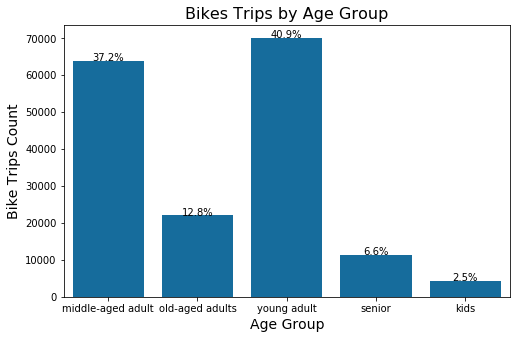

In [8]:
#Code-Source: https://www.codegrepper.com/code-examples/python/how+to+add+percentage+in+countplot
plt.figure(figsize=(8,5))
color = sns.color_palette('colorblind')[0]
ax = sns.countplot(x="bins", data=df2,color = color)
plt.title('Bikes Trips by Age Group', fontsize=16)
plt.xlabel('Age Group',fontsize='14')
plt.ylabel('Bike Trips Count', fontsize='14');
total = df2.shape[0]
bins_counts = df2['bins'].value_counts()
locs, labels = plt.xticks()

# print frequency on the bar chart
for loc, label in zip(locs, labels):
    count = bins_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/total)
    plt.text(loc, count-8, pct_string, ha='center')


## User Type by Day of week

> The number of subscribers was higher than the number of casual customers. On weekends, there is a severe decline in volume for subscribers, which suggests that they use their bicycles primarily to commute to work during the week, whereas on weekends, there is a slight increase in volume for customers, which suggests that the use is primarily leisure/touring and relaxing.

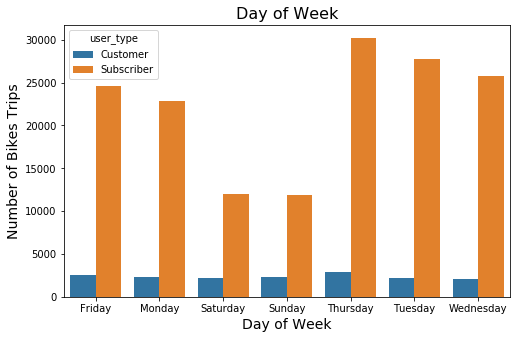

In [10]:
plt.figure(figsize=(8,5))
sns.barplot(data=mask, x="weekday",y=0, hue="user_type")
plt.title('Day of Week',fontsize=16)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Number of Bikes Trips', fontsize=14);

##  User Type and their bike trips by hours

The number of subscribers was higher than the number of casual customers. we can see from the plot clearly peaks out on typical rush hours when people go to work in the morning and getting off work in the afternoon

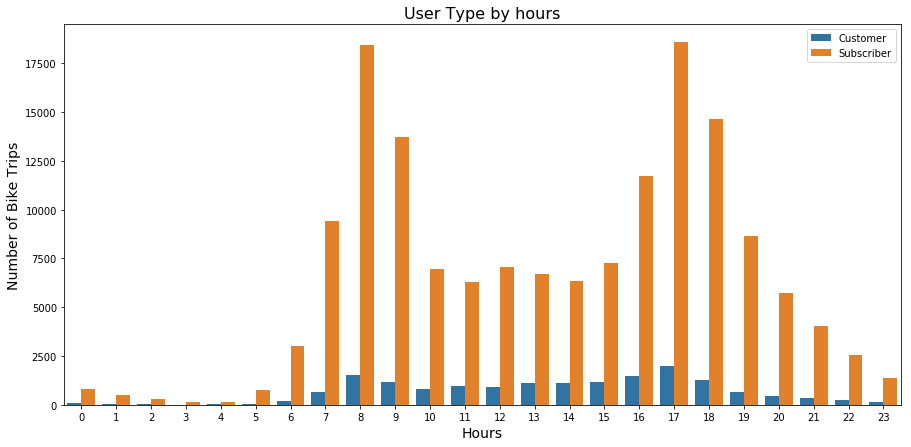

In [11]:
mask2 = df2.groupby(['start_time_hour', 'user_type']).size().reset_index()
plt.figure(figsize=(15,7))
p = sns.countplot(data = df2, x = 'start_time_hour', hue = 'user_type')
p.legend();
plt.title('User Type by hours', fontsize=16)
plt.xlabel('Hours', fontsize=14)
plt.ylabel('Number of Bike Trips', fontsize=14);

# Summary

> Since FordGo Bikes are affordable and convenient transportation for anyone, this project will benefit a substantial number of people. Customers will also be able to walk around the city in a flexible and sustainable manner. In the analysis, the service is convenient for subscribers. With Ford GoBikes, you can move around the city in a sustainable way, whether for work or leisure. Customers and subscribers alike can utilize the system. Most subscribers commute to and from work on a daily basis. On weekdays, it rents bikes from 8 a.m. to 9 a.m. and from 5 a.m. to 6 p.m., sometimes during lunchtime. Most users are tourists and occasional riders who use the system on weekends to explore the Bay Area.